<br>
<img src="https://cdn.slidesharecdn.com/ss_thumbnails/netflixprize-170320014819-thumbnail-4.jpg?cb=1489978383" width='25%'>
<h1 align='center'> Netflix Prize Challenge - Movie Recommendation </h1>
<h2 align='center'> <font color='#FC7307'> Load Data and EDA </font> </h2>
<h3 align='center'>  Wenyi Hu </h3>
<br>

## <a name='#toc'></a> Table of Contents

1. [Import Libraries](#1.-Import-Libraries)
2. [Load Data](#2.-Load-Data)
3. [EDA](#3.-EDA)

# 1. Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
import os

# for ploting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True) 

# 2. Load Data

In [2]:
%%time

# DataFrame to store all imported data
if not os.path.isfile('data.csv'):
    data = open('data.csv', mode='w')

files = ['combined_data_1.txt',
         'combined_data_2.txt',
         'combined_data_3.txt', 
         'combined_data_4.txt'
        ]

# Combine all data files into a csv file
for file in files:
    print("Opening file: {}".format(file))
    with open(file) as f:
        for line in f:
            line = line.strip()
            if line.endswith(':'):
                movie_id = line.replace(':', '')
            else:
                data.write(movie_id + ',' + line)
                data.write('\n')
data.close()

Opening file: combined_data_1.txt
Opening file: combined_data_2.txt
Opening file: combined_data_3.txt
Opening file: combined_data_4.txt
CPU times: total: 1min 40s
Wall time: 1min 48s


In [3]:
# Read all data into a pd dataframe
data = pd.read_csv('data.csv', names=['movie_id', 'user_id','rating','date'])
print(data.nunique())

movie_id     17770
user_id     480189
rating           5
date          2182
dtype: int64


In [4]:
# Convert date to datetime type
data['date'] = pd.to_datetime(data['date'])

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100480507 entries, 0 to 100480506
Data columns (total 4 columns):
 #   Column    Dtype         
---  ------    -----         
 0   movie_id  int64         
 1   user_id   int64         
 2   rating    int64         
 3   date      datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 3.0 GB


In [6]:
data.isnull().sum()

movie_id    0
user_id     0
rating      0
date        0
dtype: int64

In [7]:
data.describe()

,movie_id,user_id,rating
count,1.004805e+08,1.004805e+08,1.004805e+08
mean,9.070915e+03,1.322489e+06,3.604290e+00
std,5.131891e+03,7.645368e+05,1.085219e+00
min,1.000000e+00,6.000000e+00,1.000000e+00
25%,4.677000e+03,6.611980e+05,3.000000e+00
50%,9.051000e+03,1.319012e+06,4.000000e+00
75%,1.363500e+04,1.984455e+06,4.000000e+00
max,1.777000e+04,2.649429e+06,5.000000e+00


# 3. EDA

In [8]:
df = data
df.head()

,movie_id,user_id,rating,date
0,1,1488844,3,2005-09-06
1,1,822109,5,2005-05-13
2,1,885013,4,2005-10-19
3,1,30878,4,2005-12-26
4,1,823519,3,2004-05-03


**Profiling report**: The dataset is too large that the computer cannot loading the report

In [9]:
##Uncomment the code to run and load the report.

#from pandas_profiling import ProfileReport

#profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)

#profile.to_widgets()

**Define a function to make y-axis more readable (by changing the unit)**

In [10]:
def y_label(num, units = 'M'):
    units = units.lower()
    num = float(num) 
    if units == 'k':
        return str(num/10**3) + " K"
    elif units == 'm':
        return str(num/10**6) + " M"
    elif units == 'b':
        return str(num/10**9) + " B"

**Distribution of ratings**:
The most rating is 4, and the least rating is 1. 

D:\Wangke\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\MartinGuo\AppData\Local\Temp\ipykernel_18496\1944939720.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([y_label(item, 'M') for item in ax.get_yticks()])


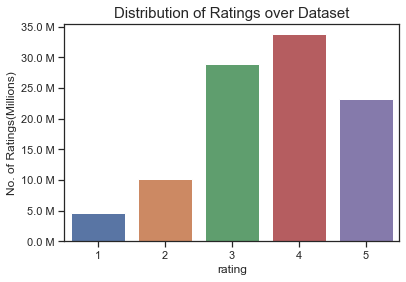

In [11]:
fig, ax = plt.subplots()
plt.title('Distribution of Ratings over Dataset', fontsize=15)
sns.countplot(df.rating)
ax.set_yticklabels([y_label(item, 'M') for item in ax.get_yticks()])
ax.set_ylabel('No. of Ratings(Millions)')
plt.show()

**Number of ratings trend**: The number of ratings per month gradually increased since 1999. The number of ratings in Jan 2004 was twice as that in 2000. After 1 year (in Jan 2005), the number of ratings was 2.5 times more.

In [12]:
data['date'].max()

Timestamp('2005-12-31 00:00:00')

In [13]:
data['date'].min()

Timestamp('1999-11-11 00:00:00')

C:\Users\MartinGuo\AppData\Local\Temp\ipykernel_18496\2956781675.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([y_label(item, 'M') for item in ax.get_yticks()])


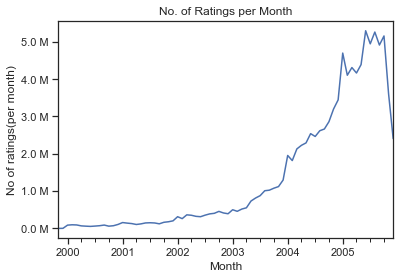

In [14]:
ax = df.resample('m', on='date')['rating'].count().plot()
ax.set_title('No. of Ratings per Month')
plt.xlabel('Month')
plt.ylabel('No of ratings(per month)')
ax.set_yticklabels([y_label(item, 'M') for item in ax.get_yticks()])
plt.show()

**Number of ratings on each day of the week**: Tuesday has the most ratings, and Saturday has the least ratings.The distribution of ratings in each day is similar.

In [15]:
df['day_of_week'] = df.date.dt.weekday

D:\Wangke\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\MartinGuo\AppData\Local\Temp\ipykernel_18496\138514957.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([y_label(item, 'M') for item in ax.get_yticks()])


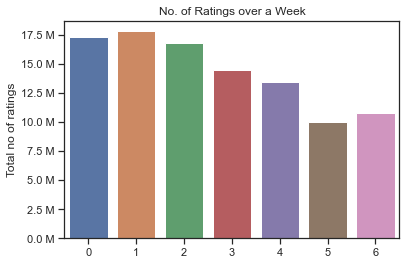

In [16]:
fig, ax = plt.subplots()
sns.countplot(df['day_of_week'])
plt.title('No. of Ratings over a Week')
plt.ylabel('Total no of ratings')
plt.xlabel('')
ax.set_yticklabels([y_label(item, 'M') for item in ax.get_yticks()])
plt.show()

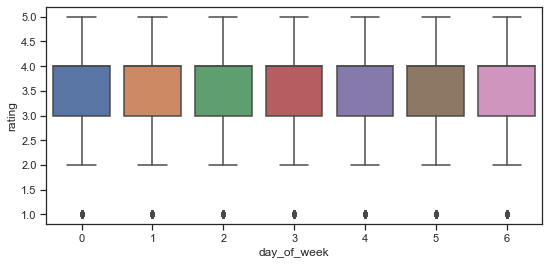

In [17]:
fig = plt.figure(figsize=plt.figaspect(.45))
sns.boxplot(y='rating', x='day_of_week', data=df)
plt.show()

**The number of ratings given by a user**: Most of users gave a small number of ratings. Only a few users (like the film critics）gave a large number of ratings.

In [18]:
no_of_rated_movies_per_user = df.groupby('user_id')['rating'].count().sort_values(ascending=False)

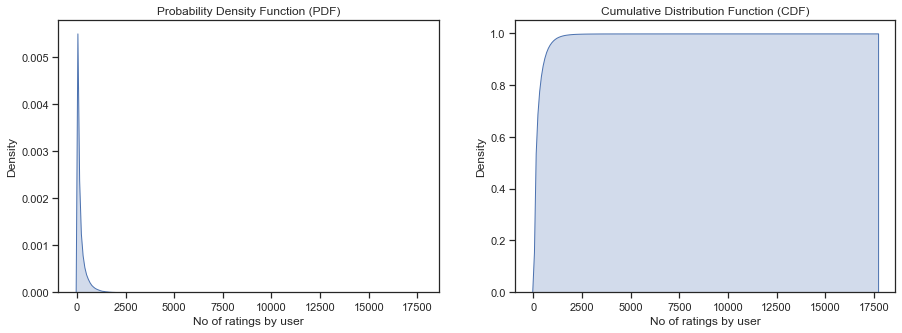

In [19]:
fig = plt.figure(figsize=(15,5))

ax1 = plt.subplot(121)
sns.kdeplot(no_of_rated_movies_per_user, shade=True)
plt.xlabel('No of ratings by user')
plt.title("Probability Density Function (PDF)")

ax2 = plt.subplot(122)
sns.kdeplot(no_of_rated_movies_per_user, shade=True, cumulative=True)
plt.xlabel('No of ratings by user')
plt.title('Cumulative Distribution Function (CDF)');

**Ratings of a movie given by users**: Most of movies were given small number of ratings, only a small number of movies (like the really popular ones) were given lots of ratings.

In [20]:
no_of_ratings_per_movie = df.groupby('movie_id')['rating'].count().sort_values(ascending=False)

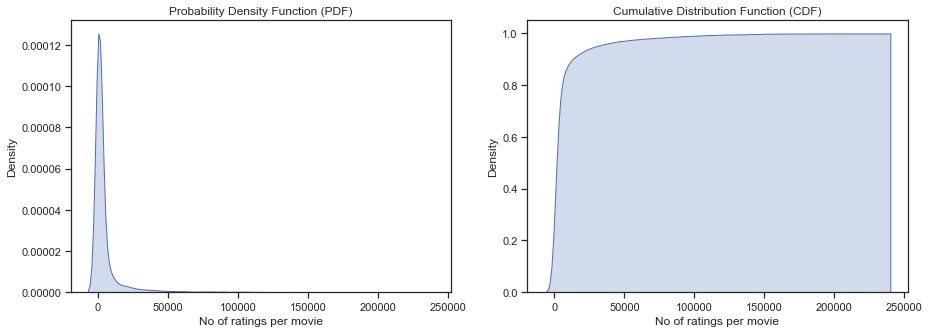

In [21]:
fig = plt.figure(figsize=(15,5))

ax1 = plt.subplot(121)
sns.kdeplot(no_of_ratings_per_movie, shade=True)
plt.xlabel('No of ratings per movie')
plt.title('Probability Density Function (PDF)')

ax2 = plt.subplot(122)
sns.kdeplot(no_of_ratings_per_movie, shade=True, cumulative=True)
plt.xlabel('No of ratings per movie')
plt.title('Cumulative Distribution Function (CDF)');